# _Python for Scientific Data Analysis_

# SciPy

## Section 2: Interpolation in SciPy 

Next, we will discuss the interpolation procedures in SciPy.  

The _interpolate_ subpackage within Scipy can be accessed by ``from scipy import interpolate``.   As before, the standard is to import numpy as well, since you will almost assuredly need it.   Also, since we usually want to display our results, importing matplotlib.pyplot is standard

```
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
```

SciPy does can do interpolation in both 1-D and 2-D.

Interpolation is essentially a form of model prediction.   You have some number of data points $x$ at which you evaluate $f(x)$ (here "$x$" is an umbrella term for some number of independent variables).  Based on the avaiable data, generate a prediction for $f(x)$ for an $x'$ value that lies within the range of your range of variables.  E.g. if you have some function evaluated at x=[1,2,3,4] and y=[1,2,3,4], use interpolation to estimate the value at x,y=[2.2,3.4].

We will start with 1-D interpolation

### 1-D Interpolation

Let's start with a very simple example: a degree-three polynomial function with only 14 data points.

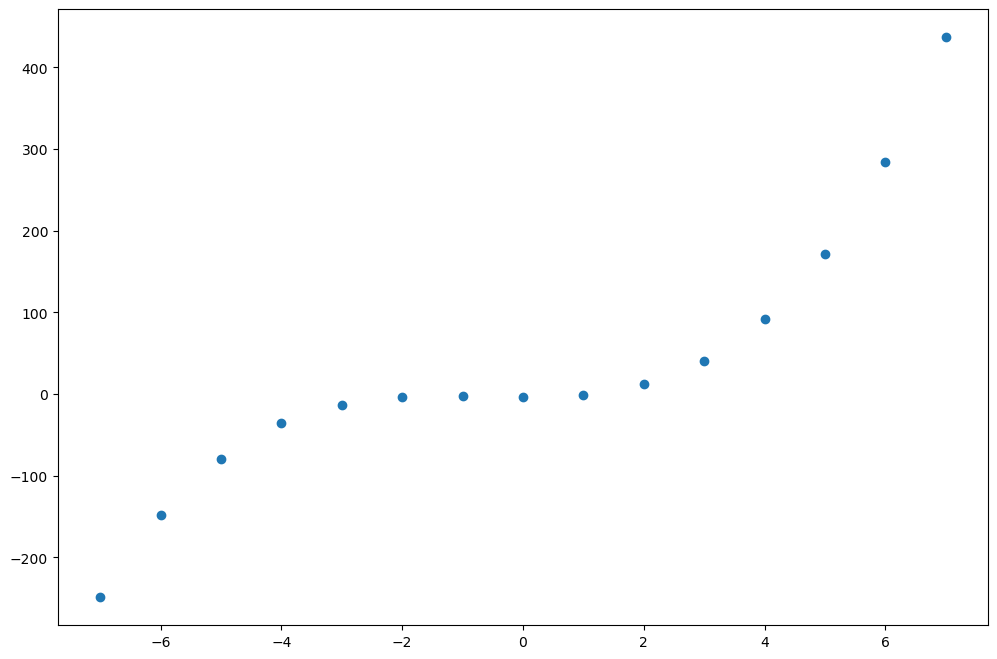

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8] #to make the figures larger in Jupyter

x=np.arange(-7,8,1)
y=x**3+2*x**2-4
plt.scatter(x, y)
plt.show()

If you display the image with ``plt.show()``, the result is roughly as you might expect: the cubic term dominates.  We will try to interpolate data points using different SciPy functions.

The long-standing function for interpolation in SciPy is ``scipy.interpolate.interp1d``.  Now, SciPy is calling this "legacy code" that will not be updated in the future.   The 2-D version -- ``interp2d`` -- is apparently deprecated and may not be included at some point in the future. But they are so widespread and the replacement plans are "fuzzy" enough (to me, at least) that we will discuss them anyway.    

We will discuss the two most common interpolation schemes -- linear and cubic spline interpolation.  There are others that crop up, especially in 2-D form when dealing with interpolating images.

#### Linear Interpolation

Now, we will do simple linear interpolation.  It is exactly how it sounds: predict value for data point in between two measurements from a straight line connecting the two bracketing points.

The function call is then something like

In [2]:
from scipy.interpolate import interp1d
f_linear = interp1d(x, y, kind='linear')


#### (Cubic) Spline Interpolation

A cubic spline interpolation of a smoothing function that have continuous first and second derivatives.

In [3]:

f_cubic = interp1d(x, y, kind='cubic')


You can see the consequence of interpolation choices on the following plot, where we compare the "ground truth" (the original function just sampled more densely) to linear and cubic interpolated values from the original $x$ array.

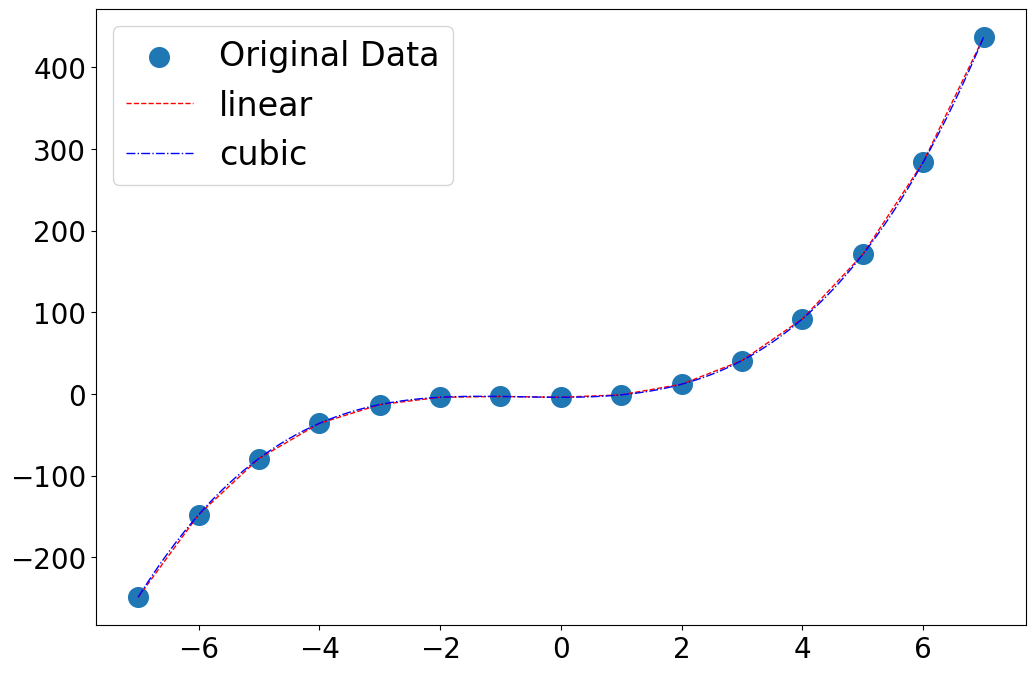

In [4]:
#denser array of x values
xnew=np.arange(-7,7.125,0.125) #this is just to get the full ranges to line up

#matplotlib stuff
fig, ax  = plt.subplots()
ax.scatter(x, y,label='Original Data',s=200)
ax.plot(xnew,f_linear(xnew),color='red',linestyle='--',label='linear',linewidth=1)
ax.plot(xnew,f_cubic(xnew),color='blue',linestyle='-.',label='cubic',linewidth=1)
ax.legend(loc='best',fontsize=24)
ax.tick_params(labelsize=20)
plt.show()


Zoomed way out, the interpolations look about the same..  You start to see some differences if you look at individual adjacent points on the new (interpolated) grid.

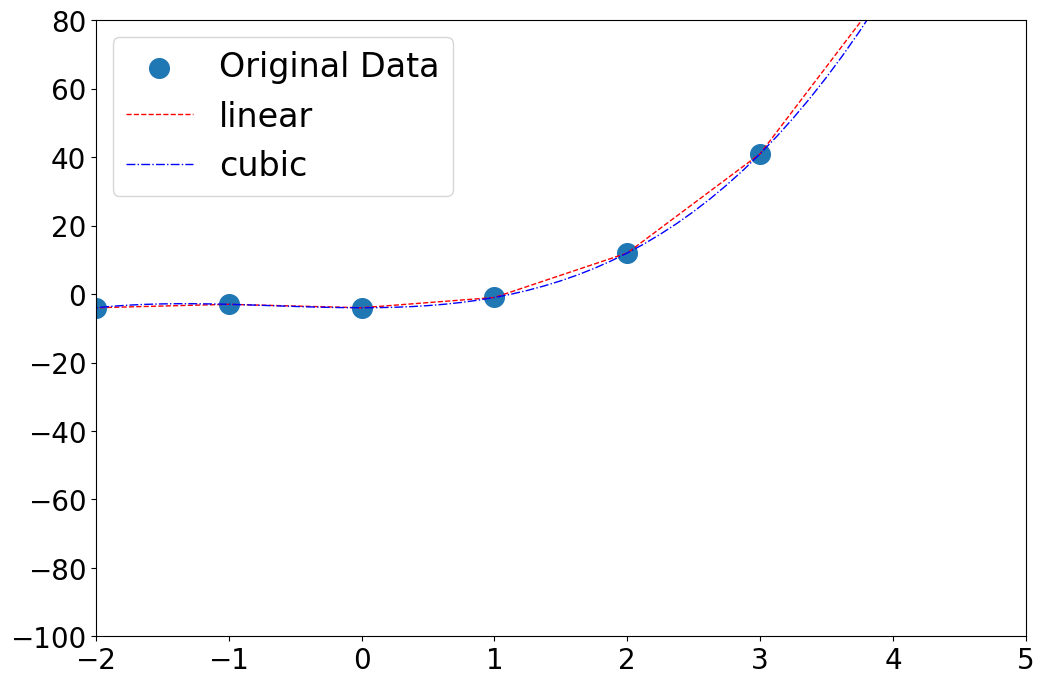

In [5]:
fig, ax  = plt.subplots()
ax.scatter(x, y,label='Original Data',s=200)
ax.plot(xnew,f_linear(xnew),color='red',linestyle='--',label='linear',linewidth=1)
ax.plot(xnew,f_cubic(xnew),color='blue',linestyle='-.',label='cubic',linewidth=1)
ax.legend(loc='best',fontsize=24)
ax.tick_params(labelsize=20)
ax.set_xlim(-2,5)
ax.set_ylim(-100,80)
plt.show()

The consequence of the interpolation method becomes even more apparent if are trying to interpolate between data points that are sparsely separated and whose value are not well described by a simple polynomial function.

 Here's an example:

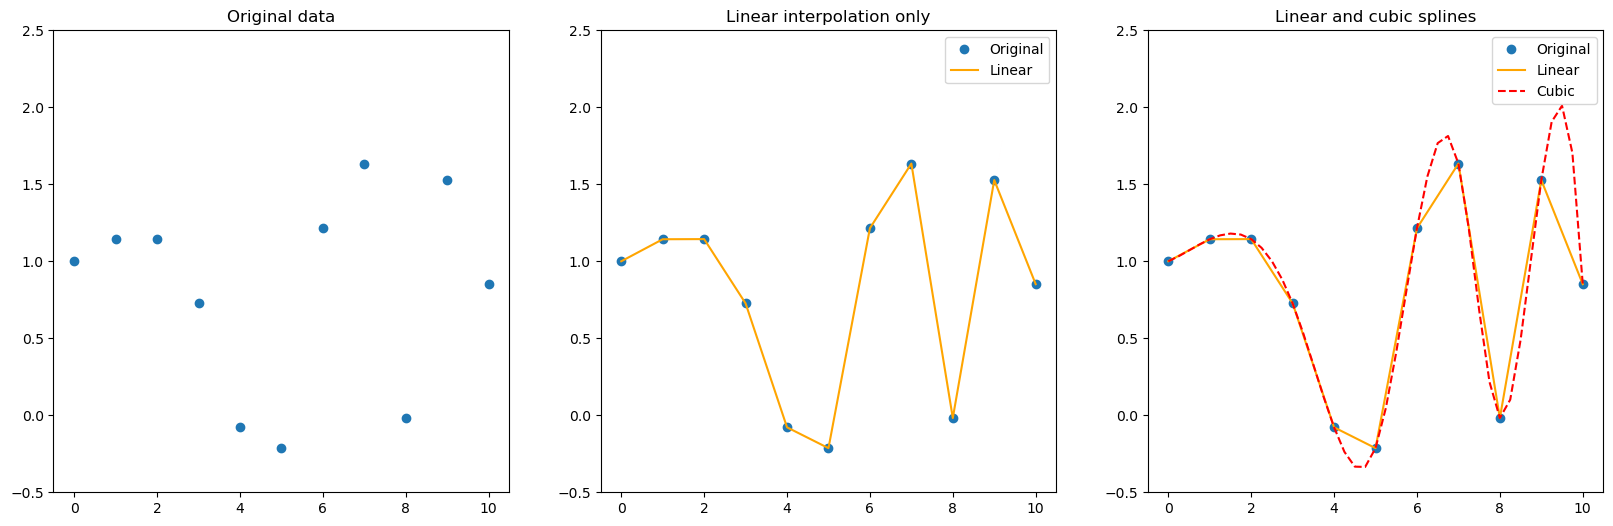

In [6]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2/7.0)+np.sin(x/6.5)

f=interp1d(x,y)
f3=interp1d(x,y,kind='cubic')

xnew = np.linspace(0, 10, num=41)
fig, ax  = plt.subplots(1,3,figsize=(20,6))

ax[0].scatter(x,y)
ax[0].set_title("Original data")
ax[0].set_ylim(-0.5,2.5)
ax[1].plot(x, y, 'o')
ax[1].plot(xnew, f(xnew), color='orange',linestyle='-')
ax[1].legend(['Original','Linear'])
ax[1].set_title("Linear interpolation only")
ax[1].set_ylim(-0.5,2.5)
ax[2].plot(x, y, 'o')
ax[2].plot(xnew, f(xnew), color='orange',linestyle='-')
ax[2].plot(xnew, f3(xnew), color='red',linestyle='--')
ax[2].legend(['Original','Linear','Cubic'])
ax[2].set_title("Linear and cubic splines")
ax[2].set_ylim(-0.5,2.5)
plt.show()

#### Interpolation vs Curve Fitting

It can be easy to confuse interpolation (which we have just done) with curve fitting/regression (previous set of notes).   These are not the same thing.   Interpolation directly connects given data points together assuming some functional form describing intermediate, not-given values.   Curve fitting calculates a best-fitting analytical function to the data.  The difference is easiest to see if you have noise in your data.

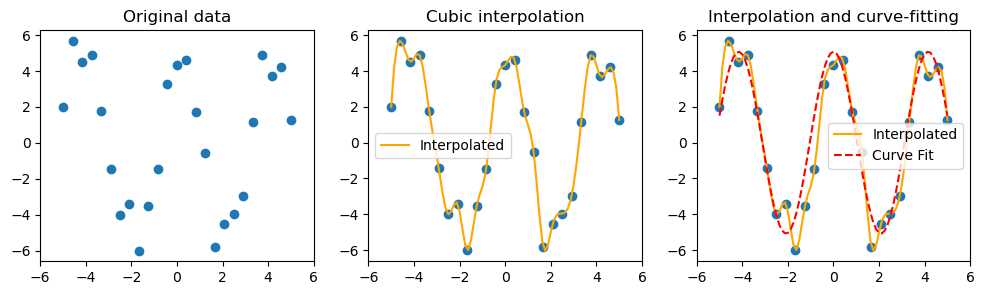

In [7]:
x = np.linspace(-5,5,num=25)
y = 4.7*np.cos(1.5*x)+np.random.normal(size=25)

xnew = np.linspace(-5, 5, num=81)
f=interp1d(x,y)
f3=interp1d(x,y,kind='cubic')

#curve fitting
from scipy.optimize import curve_fit

def func(x,a,b):
 return a*np.cos(b*x)
 #a*x**2+b*x+c

param,_=curve_fit(func,x,y)


fig, ax  = plt.subplots(1,3,figsize=(12,3))

ax[0].scatter(x,y)
ax[0].set_title("Original data")
ax[0].set_xlim(-6,6)
ax[1].plot(x, y, 'o')
ax[1].plot(xnew, f3(xnew), color='orange',linestyle='-',label='Interpolated')
ax[1].legend()
ax[1].set_title("Cubic interpolation")
ax[1].set_xlim(-6,6)
ax[2].plot(x, y, 'o')
ax[2].plot(xnew, f3(xnew), color='orange',linestyle='-',label='Interpolated')
ax[2].plot(xnew, func(xnew,param[0],param[1]), color='red',linestyle='--',label='Curve Fit')
#ax[2].legend(['Original','Cubic Interp.','Curve-fitting'],fontsize=8)
ax[2].legend()
ax[2].set_title("Interpolation and curve-fitting")
ax[2].set_xlim(-6,6)
plt.show()

### 2-D Interpolation

SciPy also does interpolation in two dimensions.   For a very long time, the workhorse function to do this (i.e. which contains a lot of the basic functionality) is ``interp2d``.   

Now, SciPy also has this flagged as "deprecated".  However, until the function is actually removed it's reasonable to proceed with learning it, as any replaces are likely to be simply better versions of this function.

Below is an example of 2-D interpolation with SciPy.

In [8]:
from scipy.interpolate import interp2d
x=np.linspace(-1,1,21)
y=np.linspace(-1,1,21)
X, Y = np.meshgrid(x, y)
Z = (X-Y) * np.exp(-6.0*(X**2+Y**2))

Now, let's take this function and do bicubic interpolation to predict the appearance with finer sampling of the data:

In [9]:
x2 = np.linspace(-1, 1, 81)
y2 = np.linspace(-1, 1, 81)
f = interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)

/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_41002/2576857190.py:3: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(x, y, Z, kind='cubic')
/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_41002/2576857190.py:4: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridIn

...and plot them side-by-side

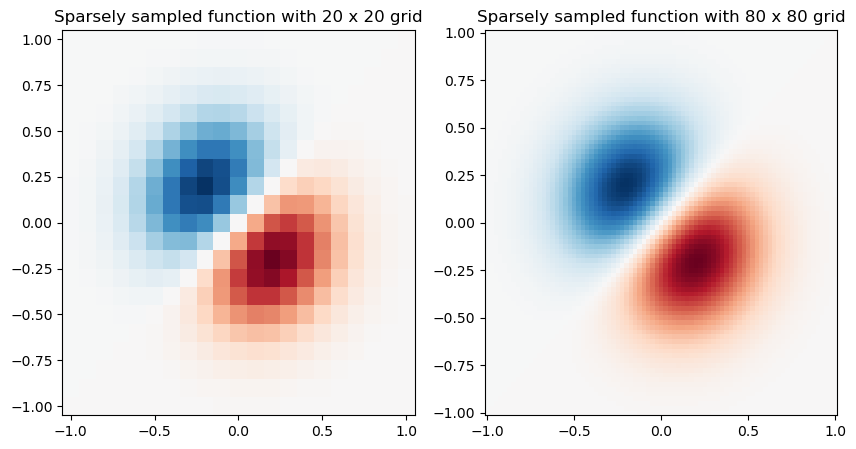

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ax[0].pcolormesh(X, Y, Z,cmap='RdBu_r',vmin=-0.25, vmax=0.25)
ax[0].set_title("Sparsely sampled function with 20 x 20 grid")
ax[1].pcolormesh(x2, y2, Z2,cmap='RdBu_r',vmin=-0.25, vmax=0.25)
ax[1].set_title("Sparsely sampled function with 80 x 80 grid")

plt.show()

#### Interpolating Images

A major application of 2-D interpolation is interpolating images (this includes astronomical images).  This is a separate topic will will hopefully pick up again in more detail when discussing Matplotlib and AstroPy.  For now,  a) know that it is an important practical application and b) let's look at two simple examples of interpolation.

* ***Resampling Images***

Here for example is an unannotated version of a press image I had in 2022, raw data:

![](./files/abaurb_charis_press_square_noannot_v2nointerp.png)

And the version with cubic interpolation:

![](./files/abaurb_charis_press_square_noannot_v2cubic.png)

And "Hanning" interpolation (which was used):

![](./files/abaurb_charis_press_square_noannot_v2hanning.png)


* ***Registering Images***

By image registration we mean shift a series of images to a common centroid position.   If you take a bunch of images with a camera they may be positionally offset from one another for various reasons (e.g. you dithered the sequence of images, the centroid position is actually moving due to telescope jitter/imperfect adaptive optics correctrions, etc.).   In any case, we therefore need to shift the positions of the images by different amounts.

Below is an example from data taken with the Keck Observatory (you will see this data set show up later in the course):

![](./figures/Figure_11.png)

These are two images and if you look very very closely you might be able to see that they are misaligned (I will blink and forth between the images on DS9 so this clearer).  The image dimensions are both (502,502) and I have determined elsewhere what the centroid positions are of each image.  So let's realign them to make the star (central thing) align perfectly at pixel 252,252 (indexed from 1 ... if indexed from 0 this would be 251,251).

A good first attempt to do this interpolation is actually found under the ``scipy.ndimage`` subpackage (apparently this stands for "multi-dimensional image processing`` (eh, whatever).  The specific function used is aptly named ``shift``.

The source code for this exercise is found in ``regtest.py`` in the code subfolder.

```
import numpy as np
from scipy.ndimage import shift
from astropy.io import fits


def run():


 image1=fits.open('../files/n0001e.fits')[0].data
 image2=fits.open('../files/n0024e.fits')[0].data

 image1=np.where(np.isnan(image1),0,image1)
 image2=np.where(np.isnan(image2),0,image2)

 xcen,ycen=image1.shape[1]//2,image1.shape[0]//2
 print(xcen,ycen)

 centroid1=[220.975,251.130]
 #centroid1=[250.975,251.130]
 centroid2=[250.112,251.806]

 result1=shift(image1,(-centroid1[0]+ycen,-centroid1[1]+xcen),order=3)
 result2=shift(image2,(-centroid2[0]+ycen,-centroid2[1]+xcen),order=3)
 #result1=shift(image1,[centroid1[0]-ycen,centroid1[1]-xcen],order=3)
 #result2=shift(image2,[centroid2[0]-ycen,centroid2[1]-xcen],order=3)

 fits.writeto('../files/shifted_1.fits',result1,overwrite=True)
 fits.writeto('../files/shifted_2.fits',result2,overwrite=True)


```

I can then run from command line as 

```
from regtest import run
run()
```

The resulting images are ``shifted_1.fits`` and ``shifted_2.fits``.

If we display these images (using DS9 because I'm running out of time), we can see that both are now precisely registered.

![](./figures/Figure_12.png)

We can compare them to the results from a more optimized code, for example the first image:

![](./figures/Figure_13.png)

The plot on the left has an image scale approximately 1000 times more aggressive than the previously displayed image.  The plot on the right shows the absolute deviation (~0.001% typically).   Not bad.
  